# 2022-1 빅데이터와 인공지능 12주차 Reports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import graphviz

import os
import warnings
warnings.filterwarnings('ignore')

## 12주차 1차시

### Question 1
1. K-NN 알고리즘의 하이퍼파라미터(k, 거리 종류, 가중치)를 변경하면서 예측성능(정분류율)을 확인하시오.
2. 시도한 하이퍼파라미터 중 가장 우수한 성능을 보인 하이퍼파라미터를 적용한 Code를 업로드하시오.

In [2]:
# Load datasets
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
# Create dataframes
df_X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_y = pd.DataFrame(data=iris_data.target, columns=['Species'])
df_iris = pd.concat([df_X, df_y], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_scaler = MinMaxScaler().fit(df_X)
iris_new = pd.DataFrame(iris_scaler.transform(df_X), columns=iris_data.feature_names)
iris_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [5]:
# Split train and test datasets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(df_iris, df_iris['Species']):
    iris_train = df_iris.loc[train_index]
    iris_test = df_iris.loc[test_index]
    X_train, y_train = iris_train.iloc[:, :4], iris_train['Species']
    X_test, y_test = iris_test.iloc[:, :4], iris_test['Species']

In [6]:
# Set hyperparameters by each case
iris_minmax_scaler = MinMaxScaler()
list_k = [i for i in range(1, 6)]
list_weights = ['uniform', 'distance']
list_metric = ['minkowski', 'manhattan', 'euclidean', 'mahalanobis']

In [7]:
# Create emmpty DataFrame for saving KNN score
score_data = []
df_score = pd.DataFrame(data=score_data, columns=list_metric, index=list_weights)
df_score

,minkowski,manhattan,euclidean,mahalanobis
uniform,NaN,NaN,NaN,NaN
distance,NaN,NaN,NaN,NaN


In [8]:
for i in list_k:
    print(f">>> k = {i}")
    for j in list_weights:
        for k in list_metric:
            if k == 'mahalanobis':
                knn_clf_iris = KNeighborsClassifier(n_neighbors=i, weights=j, metric=k, metric_params={'V' : np.cov(X_train, rowvar=False)})
            else:
                knn_clf_iris = KNeighborsClassifier(n_neighbors=i, weights=j, metric=k)
            Full_Pipeline_KNN_iris = Pipeline(steps=[('scaler', iris_minmax_scaler), ('Classifier', knn_clf_iris)])
            Full_Pipeline_KNN_iris.fit(X_train, y_train)
            iris_test_pred = Full_Pipeline_KNN_iris.predict(X_test)
            df_score.loc[j, k] = Full_Pipeline_KNN_iris.score(X_test, y_test)
    print(df_score)

>>> k = 1
         minkowski manhattan euclidean mahalanobis
uniform   0.966667  0.933333  0.966667    0.933333
distance  0.966667  0.933333  0.966667    0.933333
>>> k = 2
         minkowski manhattan euclidean mahalanobis
uniform   0.966667  0.933333  0.966667    0.933333
distance  0.966667  0.933333  0.966667    0.933333
>>> k = 3
         minkowski manhattan euclidean mahalanobis
uniform   0.966667  0.966667  0.966667    0.933333
distance  0.966667  0.966667  0.966667    0.933333
>>> k = 4
         minkowski manhattan euclidean mahalanobis
uniform   0.966667  0.966667  0.966667    0.933333
distance  0.966667  0.966667  0.966667    0.933333
>>> k = 5
         minkowski manhattan euclidean mahalanobis
uniform   0.966667  0.966667  0.966667    0.933333
distance  0.966667  0.966667  0.966667    0.933333


### Answer 1
* mahalanobis 외 대부분의 하이퍼파리미터를 적용했을 때, 96.7%의 성능을 확인할 수 있었다.

### Question 2
* Boston 집값 예측을 위한 k-NN 알고리즘을 프로그래밍하고, Code를 업로드하세요.

In [9]:
# Load datasets
from sklearn.datasets import load_boston
data_boston = load_boston().data
df_boston = pd.DataFrame(data=data_boston)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Check outlion of datasets
print(">>> Keys : \n", load_boston().keys())
print(">>> Colunns : \n", load_boston().feature_names)
print(">>> Shape: \n", data_boston.shape)

>>> Keys : 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
>>> Colunns : 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
>>> Shape: 
 (506, 13)


In [11]:
# Replace column head from class "feature_names"
df_boston.columns = load_boston().feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# Split datasets
X = df_boston.iloc[:, :-1]
y = df_boston.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Regression
knn_reg = KNeighborsRegressor(n_neighbors=1, weights='uniform', metric='minkowski')
knn_reg.fit(X_train, y_train)
boston_pred = knn_reg.predict(X_test)
print(">>> Accuracy score : ", knn_reg.score(X_test, y_test))

>>> Accuracy score :  0.306902130242634


## 12주차 2차시
### Question 3
* 학습자료로 제공된 "Multiple_regression.csv" 데이터에 대한 선형회귀모형 Code를 업로드하세요.

In [14]:
path_data_muliple_reg = os.getcwd() + '/datasets/Multiple_regression.csv'
data_muliple_reg = pd.read_csv(path_data_muliple_reg)
data_muliple_reg.head()

,X1,X2,Y
0,9,8,91
1,7,5,72
2,5,3,65
3,6,4,69
4,11,9,89


In [15]:
# Split datasets
X = data_muliple_reg.iloc[:, :2]
y = data_muliple_reg.iloc[:, 2]
Scaler_Multiple = MinMaxScaler().fit(X)
X = Scaler_Multiple.transform(X)

In [16]:
# Linear Regression - fit
Multi_LM = LinearRegression()
Multi_LM.fit(X, y)

LinearRegression()

In [17]:
# Linear Regression - predict
Multi_LM.predict(X)
print(">>> R2 Square score: ", Multi_LM.score(X, y))
print(">>> 회귀 계수 = ", Multi_LM.coef_)
print(">>> 절편 = ", Multi_LM.intercept_)

>>> R2 Square score:  0.8340638883908115
>>> 회귀 계수 =  [11.43696733 28.75710227]
>>> 절편 =  61.538707386363626


## 12주차 3차시
### Question 4
1. 의사결정나무의 하이퍼파라미터들을 변경하면서 분류 모형과 예측모형의 성능 변화를 확인하시오.
2. 실습한 Code를 업로드하세요

In [18]:
# Load datasets
path_data_airquality = os.getcwd() + '/datasets/airquality.csv'
data_airquality = pd.read_csv(path_data_airquality)
data_airquality.drop(['Unnamed: 0'], axis=1, inplace=True)
data_airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [19]:
# Check whether dataset contains Null or NaN
data_airquality.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [20]:
# Split feautre and target datasets
data_airquality.dropna(axis=0, inplace=True)
X = data_airquality.iloc[:, 1:4]
y = data_airquality['Ozone']

In [21]:
# Decision Tree Regression Example
airquality_scaler = MinMaxScaler()
tree_reg = DecisionTreeRegressor(max_depth=5)
Full_Pipeline_Tree_Reg = Pipeline(steps=[('scaler', airquality_scaler), ('Regressor', tree_reg)])
Full_Pipeline_Tree_Reg.fit(X, y)
airquality_pred = Full_Pipeline_Tree_Reg.predict(X)
print(">>> R_Squared = ", Full_Pipeline_Tree_Reg.score(X, y))

>>> R_Squared =  0.9274460561816492


In [22]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# GridSearchCV
parameters = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],\
            'splitter':['best', 'random'],\
            'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5]}

grid_dreg = GridSearchCV(tree_reg, param_grid=parameters, scoring="accuracy", cv=5)
grid_dreg.fit(X_train, y_train)

df_scores = pd.DataFrame(grid_dreg.cv_results_)
df_scores
# df_scores[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
# Error: all values from 'mean_test_score' columns have been calcaulated as NaN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000695,0.000218,0.000847,0.000758,squared_error,2,2,best,"{'criterion': 'squared_error', 'max_depth': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,0.000519,0.000053,0.000468,0.000050,squared_error,2,2,random,"{'criterion': 'squared_error', 'max_depth': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
2,0.000486,0.000027,0.000399,0.000007,squared_error,2,3,best,"{'criterion': 'squared_error', 'max_depth': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
3,0.000477,0.000031,0.000406,0.000021,squared_error,2,3,random,"{'criterion': 'squared_error', 'max_depth': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
4,0.000480,0.000028,0.000399,0.000023,squared_error,2,5,best,"{'criterion': 'squared_error', 'max_depth': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000514,0.000011,0.000399,0.000027,poisson,10,2,random,"{'criterion': 'poisson', 'max_depth': 10, 'min...",NaN,0.055556,0.055556,0.058824,NaN,NaN,NaN,28
92,0.000666,0.000100,0.000512,0.000062,poisson,10,3,best,"{'criterion': 'poisson', 'max_depth': 10, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
93,0.000696,0.000068,0.000539,0.000055,poisson,10,3,random,"{'criterion': 'poisson', 'max_depth': 10, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
94,0.000777,0.000317,0.000825,0.000607,poisson,10,5,best,"{'criterion': 'poisson', 'max_depth': 10, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,95


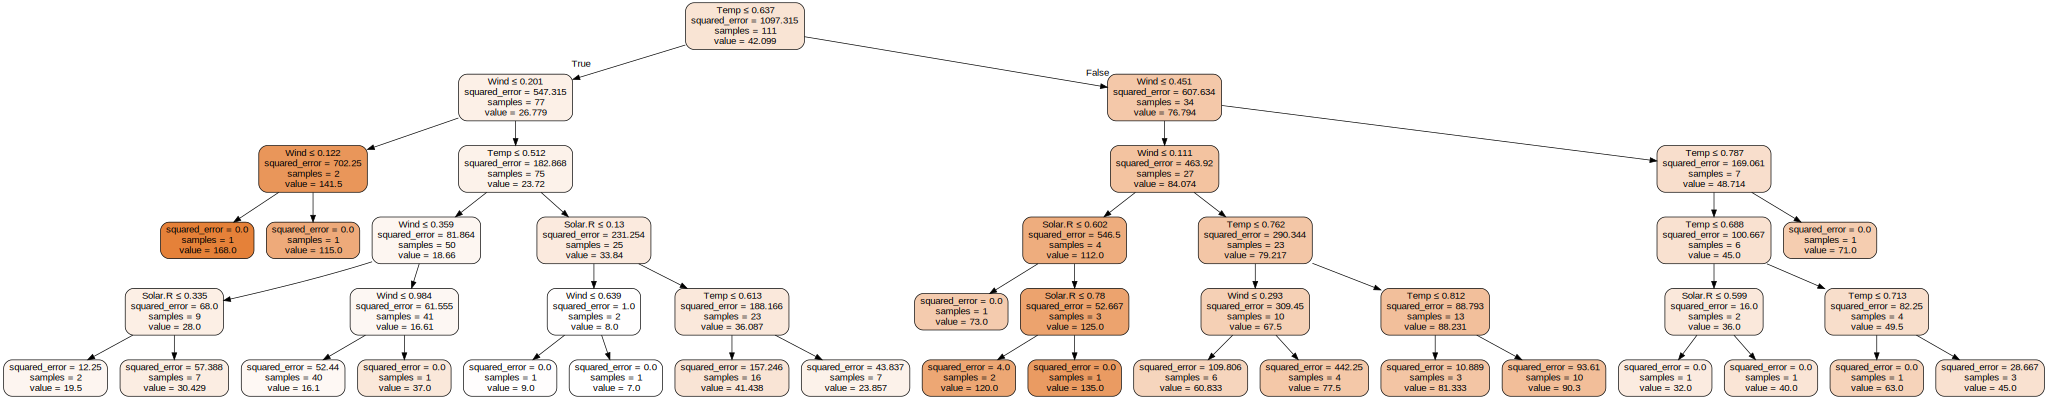

In [24]:
# Decision Tree Visualization
dot_data_2 = tree.export_graphviz(tree_reg, out_file=None, \
    feature_names=X.columns, class_names='Ozone', \
    filled=True, rounded=True, special_characters=True)

graph_2 = graphviz.Source(dot_data_2)
graph_2